<a href="https://colab.research.google.com/github/Yasidrzp/Sekeripsi/blob/main/Sekeripsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import pandas as pd
bbca = pd.read_csv("Bank Central Asia Stock Price History.csv")
asii = pd.read_csv("Astra International Stock Price History.csv")
tlkm = pd.read_csv("Telkom Indonesia Stock Price History.csv")
unvr = pd.read_csv("Unilever Indonesia Stock Price History.csv")
antm = pd.read_csv("Aneka Tambang Persero Stock Price History.csv")


In [100]:
def clean_investing(df):
    df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
    df['Price'] = df['Price'].astype(str).str.replace(',', '')
    df['Price'] = df['Price'].astype(float)
    df = df[['Date', 'Price']]
    df = df.set_index('Date')
    df = df.sort_index()
    return df

In [101]:
bbca = clean_investing(bbca)
asii = clean_investing(asii)
tlkm = clean_investing(tlkm)
unvr = clean_investing(unvr)
antm = clean_investing(antm)

In [102]:
split_date = '2019-09-19'
bbca.loc[bbca.index < split_date, 'Price'] = (
    bbca.loc[bbca.index < split_date, 'Price'] / 5
)

In [103]:
prices = pd.concat([
    bbca.rename(columns={'Price': 'BBCA'}),
    asii.rename(columns={'Price': 'ASII'}),
    tlkm.rename(columns={'Price': 'TLKM'}),
    unvr.rename(columns={'Price': 'UNVR'}),
    antm.rename(columns={'Price': 'ANTM'})
], axis=1)

prices = prices.dropna()
prices.head()


,BBCA,ASII,TLKM,UNVR,ANTM
Date,,,,,
2019-01-02,5240.0,8200.0,3730.0,9280.0,740.0
2019-01-03,5180.0,8375.0,3740.0,9500.0,750.0
2019-01-04,5205.0,8350.0,3710.0,9560.0,760.0
2019-01-07,5245.0,8150.0,3770.0,9720.0,770.0
2019-01-08,5240.0,8175.0,3800.0,9470.0,760.0


In [104]:
import numpy as np
import matplotlib.pyplot as plt


returns = np.log(prices / prices.shift(1))
bbca['Return'] = np.log(bbca['Price'] / bbca['Price'].shift(1))
returns = returns.dropna()
returns.head()





,BBCA,ASII,TLKM,UNVR,ANTM
Date,,,,,
2019-01-03,-0.011516,0.021117,0.002677,0.023430,0.013423
2019-01-04,0.004815,-0.002990,-0.008054,0.006296,0.013245
2019-01-07,0.007656,-0.024244,0.016043,0.016598,0.013072
2019-01-08,-0.000954,0.003063,0.007926,-0.026057,-0.013072
2019-01-09,0.002859,0.003053,-0.018593,-0.028925,0.025975


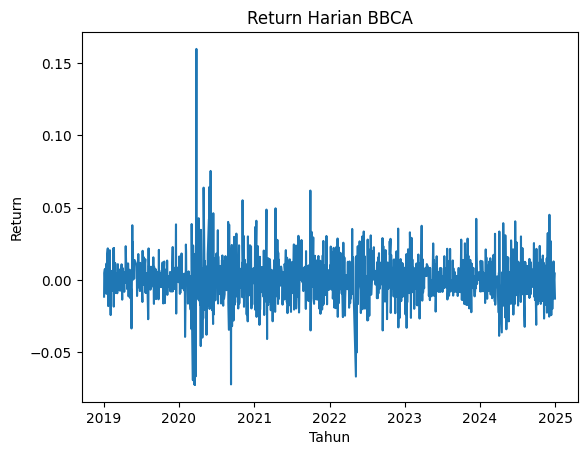

In [105]:
plt.figure()
plt.plot(bbca.index, bbca['Return'])
plt.title('Return Harian BBCA')
plt.xlabel('Tahun')
plt.ylabel('Return')
plt.show()


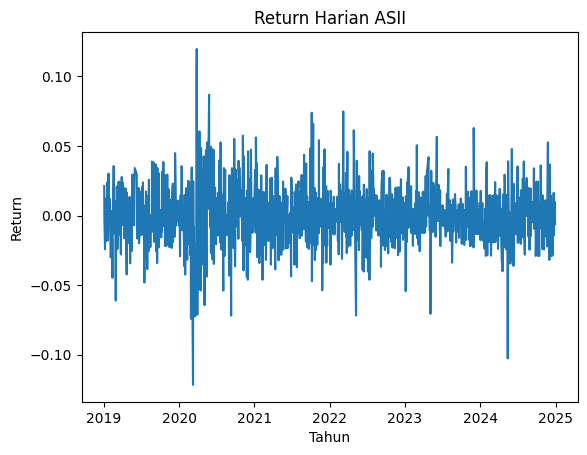

In [93]:
plt.figure()
plt.plot(returns.index, returns['ASII'])
plt.title('Return Harian ASII')
plt.xlabel('Tahun')
plt.ylabel('Return')
plt.show()

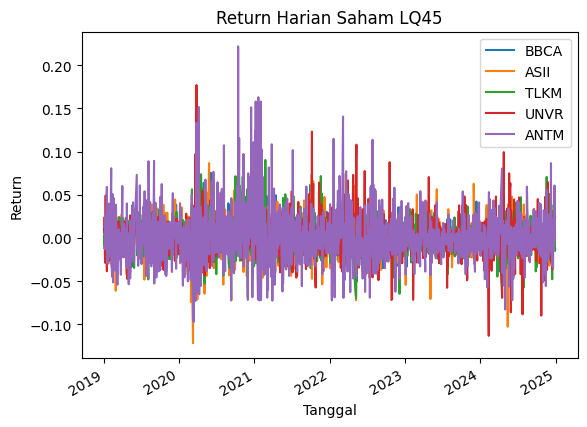

In [94]:
returns.plot()
plt.title('Return Harian Saham LQ45')
plt.xlabel('Tanggal')
plt.ylabel('Return')
plt.show()


In [95]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1455 entries, 2019-01-03 to 2024-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BBCA    1455 non-null   float64
 1   ASII    1455 non-null   float64
 2   TLKM    1455 non-null   float64
 3   UNVR    1455 non-null   float64
 4   ANTM    1455 non-null   float64
dtypes: float64(5)
memory usage: 68.2 KB


In [98]:
Statistikdasar = returns.describe()
Statistikdasar




,BBCA,ASII,TLKM,UNVR,ANTM
count,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000
mean,0.000421,-0.000354,-0.000220,-0.001095,0.000497
std,0.015220,0.020248,0.018423,0.021045,0.030256
min,-0.072571,-0.121645,-0.072162,-0.113206,-0.097164
25%,-0.007348,-0.011111,-0.010695,-0.012085,-0.015504
50%,0.000000,0.000000,0.000000,-0.001778,0.000000
75%,0.008066,0.010602,0.009967,0.008259,0.013216
max,0.159849,0.119623,0.128749,0.177169,0.221836


In [97]:
desc_stats = pd.DataFrame({
    'Mean': returns.mean(),
    'Std Dev': returns.std(),
    'Skewness': returns.skew(),
    'Kurtosis': returns.kurtosis()
})

desc_stats


,Mean,Std Dev,Skewness,Kurtosis
BBCA,0.000421,0.015220,0.753686,10.858705
ASII,-0.000354,0.020248,0.016289,3.622285
TLKM,-0.000220,0.018423,0.420768,4.030914
UNVR,-0.001095,0.021045,0.875068,8.184111
ANTM,0.000497,0.030256,1.202187,5.634104
